### Q1

The statement is essentialy a law of large numbers for the variance, showing how the spread of sample means narrows around the population mean as the sample size n increases.

It conveys the idea that larger sample sizes lead to a significant reduction in the variability of the sample mean, thereby improving the accuracy of estimates derived from those samples.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

A random seed is set for reproducibility, with parameters defined for a normal distribution having mean 0 and variance 1. A range of sample sizes and the number of simulations are selected to analyze the behavior of the sample mean as the sample size increases. Fow what it concerns the sample sizes, different values of n are used to observe how the sample mean behaves for small and large sample sizes during the simulations.

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the distribution parameters
mu = 0        # True mean E(Z)
sigma = 1     # Standard deviation sqrt(Var(Z))
n_values = [5, 10, 50, 100, 500, 1000]  # Different sample sizes
num_simulations = 10000                 # Number of simulations for each n

# To store results for plotting
empirical_var_of_mean = []
theoretical_var_of_mean = []

A loop is established to investigate the sampling distribution of the sample mean across varying sample sizes. 
Within this loop, the empirical variance of the sample mean is calculated based on simulated samples drawn from a normal distribution. This empirical variance is then compared with the theoretical variance, which is determined by the properties of the underlying distribution.

In [5]:
# Simulation loop for each value of n
for n in n_values:
    # Simulate num_simulations samples of size n from N(mu, sigma^2)
    samples = np.random.normal(loc=mu, scale=sigma, size=(num_simulations, n))

    # Compute sample means for each simulation
    sample_means = np.mean(samples, axis=1)
    
    # Compute squared deviations (empirical variance of sample mean)
    squared_deviations = (sample_means - mu)**2
    
    # Empirical estimate of the expectation (mean squared deviation)
    empirical_var = np.mean(squared_deviations)
    
    # Theoretical value of variance of sample mean
    theoretical_var = sigma**2 / n  # Var(Z)/n
    
    # Store results for plotting
    empirical_var_of_mean.append(empirical_var)
    theoretical_var_of_mean.append(theoretical_var)

By iterating through different sample sizes, the loop elucidates the relationship between sample size and the variance of the sample mean.

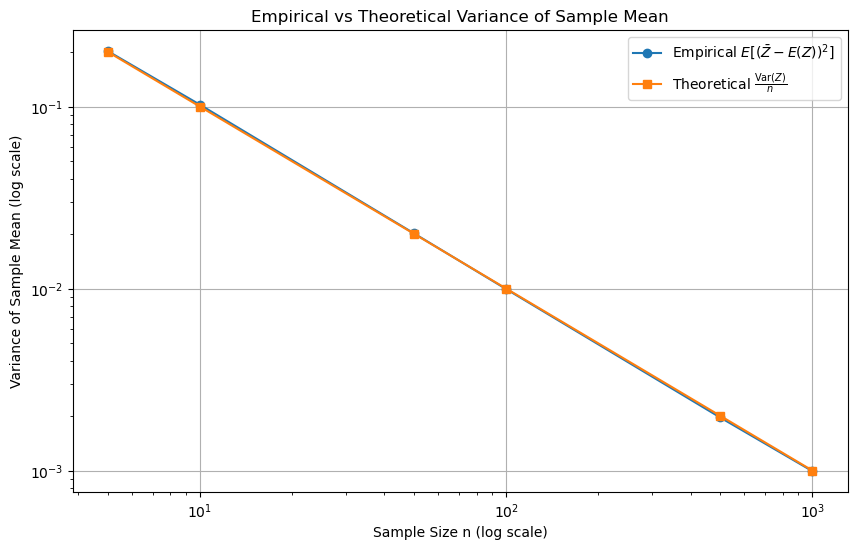

In [7]:
# Plot the results to compare empirical and theoretical variances
plt.figure(figsize=(10, 6))
plt.plot(n_values, empirical_var_of_mean, 'o-', label="Empirical $E[(\\bar{Z} - E(Z))^2]$")
plt.plot(n_values, theoretical_var_of_mean, 's-', label="Theoretical $\\frac{\\text{Var}(Z)}{n}$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size n (log scale)')
plt.ylabel('Variance of Sample Mean (log scale)')
plt.title('Empirical vs Theoretical Variance of Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

As n increases, the empirical variance converges to the theoretical variance. This outcome highlights the foundational concept in statistics that larger sample sizes lead to more accurate estimations.

Independence among random variables is essential because it helps ensure that the average of the samples gets more accurate as more data are gathered. When variables are independent, the variation in the sample mean decreases predictably, allowing it to converge to the true population mean. If the variables were correlated or dependent, the variability in the average would not decrease as expected, making the estimates less reliable.

### Q2

A procedure similar to the Q1 one can be proposed to illustrate the central limit theorem.

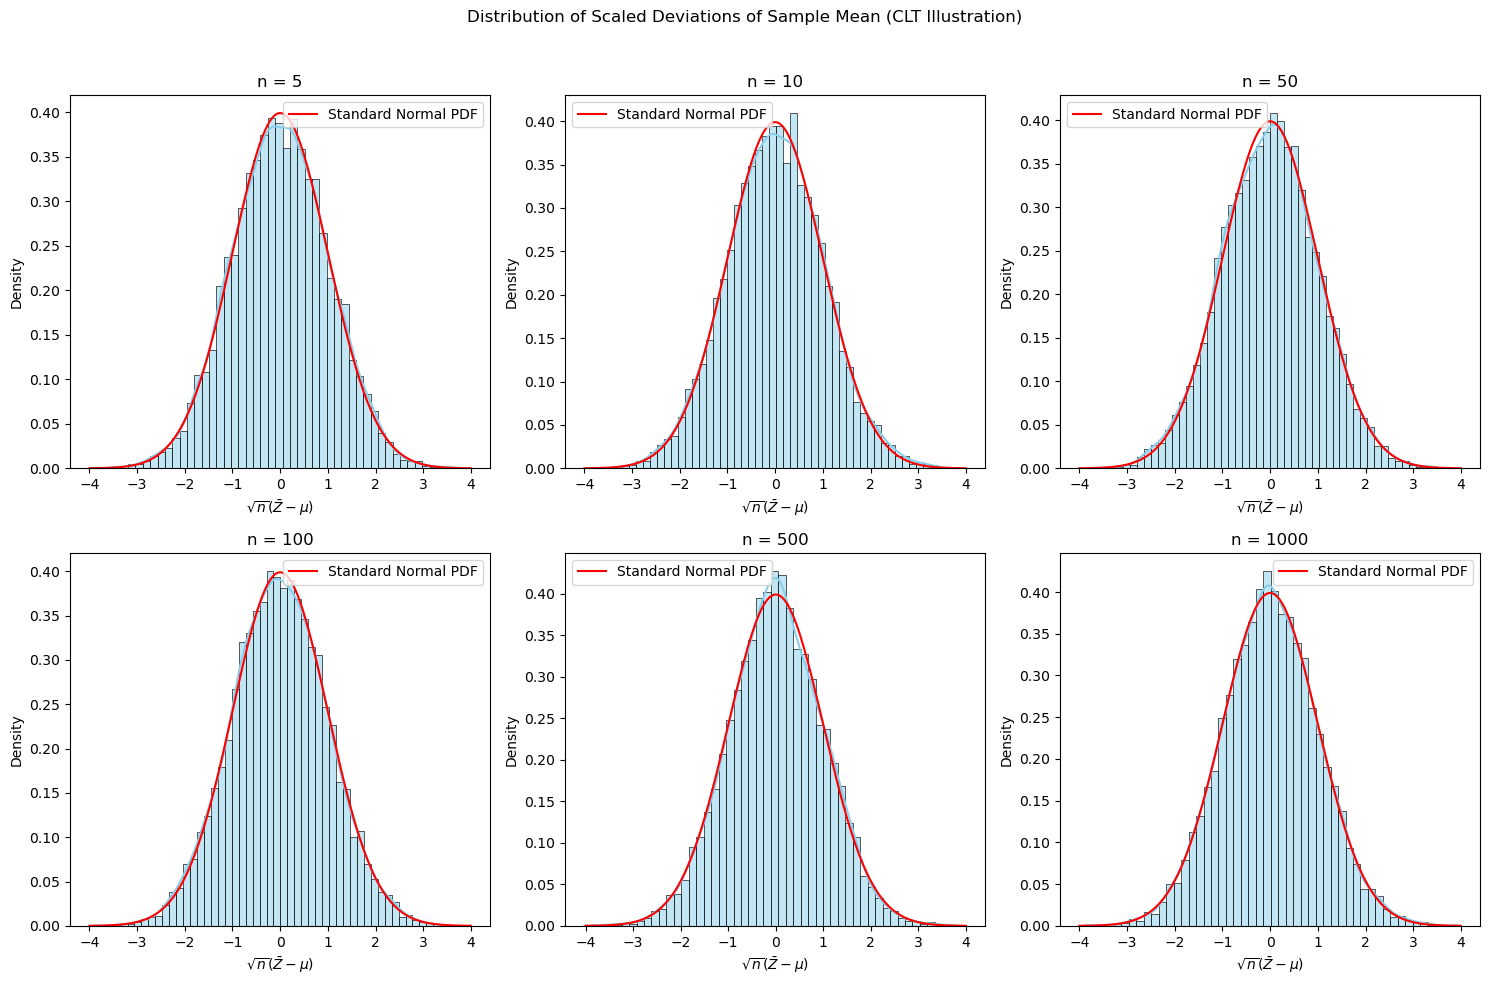

In [9]:
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define the distribution parameters
mu = 0        # True mean E(Z)
sigma = 1     # Standard deviation sqrt(Var(Z))
n_values = [5, 10, 50, 100, 500, 1000]  # Different sample sizes
num_simulations = 10000                 # Number of simulations for each n

# Set up the figure for plotting
plt.figure(figsize=(15, 10))

# Define the range of x-values for consistent scaling across subplots
x = np.linspace(-4, 4, 200)

# Loop through each sample size and compute scaled deviations
for i, n in enumerate(n_values, 1):
    # Simulate num_simulations samples of size n from N(mu, sigma^2)
    samples = np.random.normal(loc=mu, scale=sigma, size=(num_simulations, n))
    
    # Compute sample means for each simulation
    sample_means = np.mean(samples, axis=1)
    
    # Compute scaled deviations √n * (sample_mean - mu)
    scaled_deviations = np.sqrt(n) * (sample_means - mu)
    
    # Plot histogram of scaled deviations
    plt.subplot(2, 3, i)
    sns.histplot(scaled_deviations, bins=50, kde=True, stat="density", color="skyblue", edgecolor="black")
    
    # Overlay the standard normal distribution for comparison
    plt.plot(x, 1/np.sqrt(2 * np.pi) * np.exp(-x**2 / 2), 'r', label="Standard Normal PDF")
    
    # Labels and title for each subplot
    plt.title(f"n = {n}")
    plt.xlabel(r"$\sqrt{n} (\bar{Z} - \mu)$")
    plt.ylabel("Density")
    plt.legend()

# Adjust layout and show the plot
plt.suptitle("Distribution of Scaled Deviations of Sample Mean (CLT Illustration)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

This simulation empirically demonstrates the CLT by showing that, with larger sample sizes, the distribution of the scaled deviations aligns more closely with the standard normal distribution.

### Q3

In [11]:
# Import necessary libraries
from scipy.stats import bernoulli

A fixed seed is used. The setup involves generating 3,000 data points, where each data point consists of 8 values, representing an 8-dimensional vector. This ensures that the generated data follows the intended structure.

In [13]:
# Set seed for reproducibility
np.random.seed(42)

# Number of samples and dimension p
n = 3000
p = 8

A collection of 8-dimensional Gaussian vectors is generated. Each component of this colletion follows a normal distribution with mean 0 and identity covariance. A function is then defined to calculate a specific probability for each vector, based on the first two components. This probability is computed for all the generated vectors, resulting in an array of values.

In [15]:
# Generate Gaussian vector X ~ N(0, I_p) where I_p is the identity matrix of size p
X = np.random.multivariate_normal(mean=np.zeros(p), cov=np.identity(p), size=n)

# Define the function p(x) as per the problem statement
def p_x(x):
    return np.exp(x[0] + x[1]**2) / (1 + np.exp(x[0] + x[1]**2))

# Generate probabilities p(X) for each sample in X
p_vals = np.array([p_x(x) for x in X])

The generated probabilities are used to draw Bernoulli-distributed random variables, producing a binary outcome for each sample, based on the computed probabilities.

In [17]:
# Generate Bernoulli random variable Y based on p(X)
Y = bernoulli.rvs(p_vals)

To demonstrate the relationship between $x_1$, $x_2$, and the output $Y$, it is possible to visualize how the first two components of the generated Gaussian vectors correlate with the Bernoulli outcomes. This can be achieved through scatter plots and conditional histograms.

The scatter plot shows points representing each sample in terms of $x_1$ (horizontal axis) and $x_2$ (vertical axis). Each point is colored according to its corresponding output $Y$, with one color representing "failure" ($0$) and another representing "success" ($1$). If the points corresponding to $Y=1$ (success) cluster in a specific region compared to those for $Y=0$ (failure), it suggests a strong relationship between these features and the output.

The histogram of $x_1$ shows the distribution of $x_1$ values conditioned on the output $Y$. The bars are stacked based on the value of $Y$, allowing for a direct comparison of how $x_1$ is distributed for each outcome. If one color dominates in certain ranges of $x_1$, it indicates that $x_1$ has a strong influence on whether the output is $0$ or $1$.

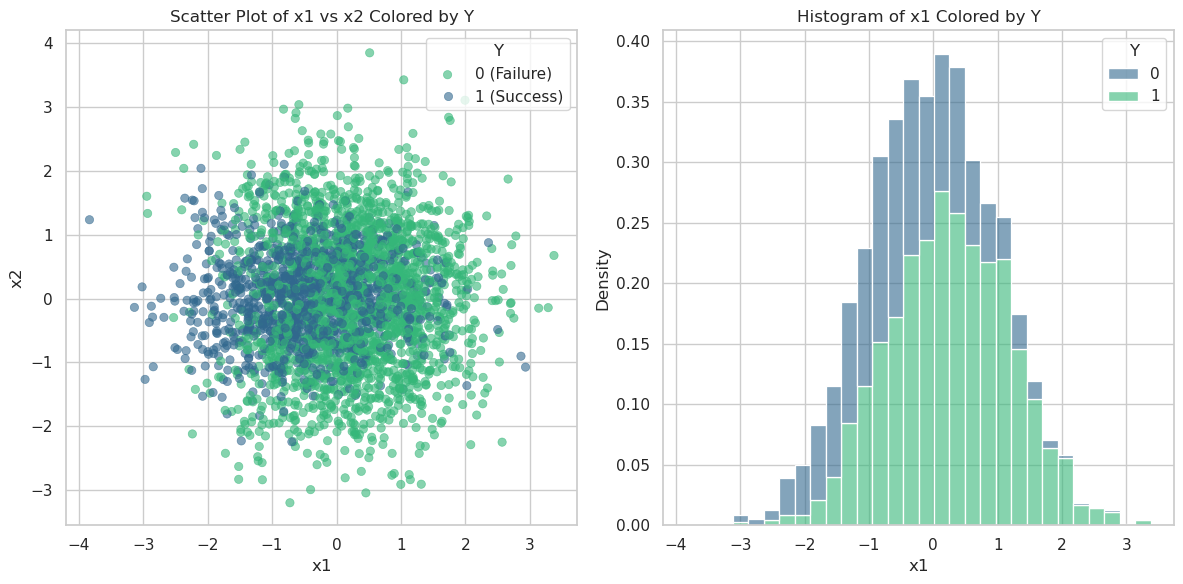

In [19]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot for x1 vs. x2 colored by the output Y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='viridis', alpha=0.6, edgecolor=None)
plt.title('Scatter Plot of x1 vs x2 Colored by Y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='Y', loc='upper right', labels=['0 (Failure)', '1 (Success)'])

# Create a conditional histogram of x1 and x2 for each value of Y
plt.subplot(1, 2, 2)
sns.histplot(data={'x1': X[:, 0], 'x2': X[:, 1], 'Y': Y}, 
             x='x1', hue='Y', multiple='stack', stat='density', bins=30, palette='viridis', alpha=0.6)
plt.title('Histogram of x1 Colored by Y')
plt.xlabel('x1')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

These plots provide insight into how $x_1$ and $x_2$ relate to the outcome $Y$. These features have a more significant influence on the results compared to the others.
In fact, the function used to compute the probabilities, $p(X)$, explicitly depends on $x_1$ and $x_2$. This means that the output $Y$ is directly influenced by these two dimensions, making them the primary drivers for the Bernoulli outcome. As $x_1$ and $x_2$ change, the probabilities change significantly, which in turn affects whether $Y$ takes on the value $0$ or $1$.

### Q4

The logistic function is defined as:

$$
q_{\beta}(x) = \frac{\exp(\beta_0 + \beta^T x)}{1 + \exp(\beta_0 + \beta^T x)}
$$

The logistic regression objective function, which needs to be minimized, is given by:

$$
L(\beta) = -\sum_{i=1}^n \left( Y_i \log(q_{\beta}(X_i)) + (1 - Y_i) \log(1 - q_{\beta}(X_i)) \right)
$$

In the equations above:

- $Y_i$ represents the binary label for each sample $i$.
- $X_i$ is the feature vector for sample $i$.
- $\beta_0$ is the intercept term, and $\beta$ is the vector of feature coefficients.
- $n$ is the total number of samples.

In [21]:
# Define logistic function q_beta(x)
def q_beta(beta, x):
    z = beta[0] + np.dot(beta[1:], x)
    return np.exp(z) / (1 + np.exp(z))

# Define logistic regression objective function
def logistic_loss(beta, X, Y):
    n = len(Y)
    total_loss = 0
    for i in range(n):
        q = q_beta(beta, X[i])
        total_loss += -Y[i] * np.log(q) - (1 - Y[i]) * np.log(1 - q)
    return total_loss / n

# Compute the gradient of the logistic loss for GD
def logistic_gradient(beta, X, Y):
    n, p = X.shape
    grad = np.zeros(p + 1)
    for i in range(n):
        q = q_beta(beta, X[i])
        error = q - Y[i]
        grad[0] += error  # Gradient for beta_0
        grad[1:] += error * X[i]  # Gradient for beta_1 to beta_p
    return grad / n

# Compute the gradient for a single sample for SGD
def stochastic_gradient(beta, X_i, Y_i):
    q = q_beta(beta, X_i)
    error = q - Y_i
    grad = np.zeros(len(beta))
    grad[0] = error  # Gradient for beta_0
    grad[1:] = error * X_i  # Gradient for beta_1 to beta_p
    return grad

# Gradient Descent (GD) implementation
def gradient_descent(X, Y, beta_init, iterations):
    beta = beta_init.copy()
    n = len(Y)
    path = [beta.copy()]
    for k in range(1, iterations + 1):
        grad = logistic_gradient(beta, X, Y)
        learning_rate = 1 / k
        beta -= learning_rate * grad
        if k % (iterations // 10) == 0:  # Print every 10% of the iterations
            print(f"GD Iteration {k}: beta = {beta}")
        path.append(beta.copy())
    return beta, path

# Stochastic Gradient Descent (SGD) implementation
def stochastic_gradient_descent(X, Y, beta_init, iterations):
    beta = beta_init.copy()
    n = len(Y)
    path = [beta.copy()]
    for k in range(1, iterations + 1):
        i = np.random.randint(n)
        grad = stochastic_gradient(beta, X[i], Y[i])
        learning_rate = 1 / k
        beta -= learning_rate * grad
        if k % (iterations // 10) == 0:  # Print every 10% of the iterations
            print(f"SGD Iteration {k}: beta = {beta}")
        path.append(beta.copy())
    return beta, path

The Gradient Descent update rule is given by:

$$
\beta = \beta - \frac{1}{k} \nabla L(\beta)
$$

The Stochastic Gradient Descent update rule is given by:

$$
\beta = \beta - \frac{1}{k} \nabla L(\beta; X_i, Y_i)
$$

To observe the optimization path, it is necessary to print the values of β at regular intervals (every 10% of total iterations) for both GD and SGD, enabling a comparison of their convergence patterns.

In [23]:
# Experimental setup
np.random.seed(0)
n, p = 100, 2  # Number of samples and features
X = np.random.randn(n, p)  # Randomly generated features
Y = (np.random.rand(n) > 0.5).astype(int)  # Randomly generated binary labels
beta_init = np.zeros(p + 1)  # Initial beta, including beta_0

# Run GD and SGD
iterations = 100
print("Running Gradient Descent (GD)...")
beta_gd, path_gd = gradient_descent(X, Y, beta_init, iterations)

print("\nRunning Stochastic Gradient Descent (SGD)...")
beta_sgd, path_sgd = stochastic_gradient_descent(X, Y, beta_init, iterations)

Running Gradient Descent (GD)...
GD Iteration 10: beta = [-0.10202579  0.0120767  -0.17335354]
GD Iteration 20: beta = [-0.11337221  0.0132584  -0.19412139]
GD Iteration 30: beta = [-0.11905791  0.01383128 -0.20471989]
GD Iteration 40: beta = [-0.12270608  0.01419089 -0.21160085]
GD Iteration 50: beta = [-0.12533122  0.01444534 -0.21659616]
GD Iteration 60: beta = [-0.1273512   0.01463847 -0.22046734]
GD Iteration 70: beta = [-0.12897571  0.01479197 -0.22359927]
GD Iteration 80: beta = [-0.1303238   0.01491806 -0.22621171]
GD Iteration 90: beta = [-0.13146902  0.0150242  -0.22844113]
GD Iteration 100: beta = [-0.13245975  0.01511527 -0.23037766]

Running Stochastic Gradient Descent (SGD)...
SGD Iteration 10: beta = [-0.71627953  0.57404544 -0.62557235]
SGD Iteration 20: beta = [-0.66054951  0.42862179 -0.65876489]
SGD Iteration 30: beta = [-0.53356753  0.46186067 -0.52952945]
SGD Iteration 40: beta = [-0.52095312  0.52764993 -0.53963216]
SGD Iteration 50: beta = [-0.49587303  0.5316797

Gradient Descent shows smooth, steady convergence with consistent, gradual updates due to full-batch gradients, though it requires higher computational cost. In contrast, Stochastic Gradient Descent converges more quickly per update but follows a noisier path due to sample-based randomness in each step.

### Q5

The misclassification risk for both **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)** is here evaluated using an additional set of 1000 samples generated from the same data generation process.

The **misclassification risk** is defined as:

$$
\text{Misclassification Risk} = \frac{1}{n} \sum_{i=1}^{n} \mathbb{I}(\hat{y}_i \neq Y_i)
$$

where:
- $ \hat{y}_i = \text{sign}(q_{\beta}(X_i) $ is the predicted label
- $ \mathbb{I}(\cdot) $ is the indicator function that returns 1 if the condition is true and 0 otherwise.

In [26]:
def generate_data(n, p):
    """ Generate random data points X and binary labels Y for logistic regression. """
    X = np.random.randn(n, p)
    # Assume beta_0 = 0, and beta coefficients for simplicity, using a simple logistic model
    beta_true = np.zeros(p)
    beta_0 = 0
    linear_model = np.dot(X, beta_true) + beta_0
    prob = 1 / (1 + np.exp(-linear_model))
    Y = (prob > 0.5).astype(int)
    return X, Y

# Generate training data
n_train = 1000  # Training set size
p = 10  # Number of features
X_train, Y_train = generate_data(n_train, p)

# Generate test data
n_test = 1000  # New test set for evaluating misclassification
X_test, Y_test = generate_data(n_test, p)

# Define the model functions (SGD and GD training steps)
def logistic_function(X, beta):
    """ Logistic function q_beta(X) = exp(beta_0 + beta^T * X) / (1 + exp(beta_0 + beta^T * X)) """
    return 1 / (1 + np.exp(-(np.dot(X, beta))))

def gradient(X, Y, beta):
    """ Compute the gradient of the loss function. """
    q = logistic_function(X, beta)
    return np.dot(X.T, (q - Y)) / len(Y)

def predict(X, beta):
    """ Make predictions based on the logistic regression model. """
    return (logistic_function(X, beta) > 0.5).astype(int)

# Train with GD (full batch gradient descent)
def gradient_descent(X, Y, beta_init, learning_rate=1.0, max_iter=1000):
    beta = beta_init
    for k in range(1, max_iter + 1):
        grad = gradient(X, Y, beta)
        beta = beta - (learning_rate / k) * grad  # Learning rate decays as 1/k
    return beta

# Train with SGD (stochastic gradient descent)
def stochastic_gradient_descent(X, Y, beta_init, learning_rate=1.0, max_iter=1000):
    beta = beta_init
    n = len(Y)
    for k in range(1, max_iter + 1):
        for i in range(n):
            grad = gradient(X[i:i+1], Y[i:i+1], beta)  # Use only one sample
            beta = beta - (learning_rate / k) * grad  # Learning rate decays as 1/k
    return beta

# Initialize beta (starting point)
beta_init = np.zeros(p)

# Train the models
beta_gd = gradient_descent(X_train, Y_train, beta_init)
beta_sgd = stochastic_gradient_descent(X_train, Y_train, beta_init)

# Evaluate on test data and calculate misclassification rates
y_pred_gd = predict(X_test, beta_gd)
y_pred_sgd = predict(X_test, beta_sgd)

# Calculate the misclassification rate
misclassification_rate_gd = np.mean(y_pred_gd != Y_test)
misclassification_rate_sgd = np.mean(y_pred_sgd != Y_test)

# Output the misclassification rates
print(f'Misclassification Rate for Gradient Descent: {misclassification_rate_gd}')
print(f'Misclassification Rate for Stochastic Gradient Descent: {misclassification_rate_sgd}')

Misclassification Rate for Gradient Descent: 0.485
Misclassification Rate for Stochastic Gradient Descent: 0.481


The misclassification rates for GD and SGD are almost identical, with only a minor difference. This suggests that both training approaches result in nearly the same level of accuracy.

### Q6

The linear model follows the traditional logistic regression function:

$$ q_{\beta}(x) = \frac{\exp(\beta_0 + \beta^T x)}{1 + \exp(\beta_0 + \beta^T x)} $$

The non-linear model adds quadratic terms to the input to increase model flexibility:

$$ q_{\beta, \gamma}(x) = \frac{\exp(\beta_0 + \beta^T x + \gamma^T x^2)}{1 + \exp(\beta_0 + \beta^T x + \gamma^T x^2)} $$

In [30]:
# Define the new logistic function q_beta_gamma(x)
def q_beta_gamma(beta, gamma, x):
    z = beta[0] + np.dot(beta[1:], x) + np.dot(gamma, x**2)
    return np.exp(z) / (1 + np.exp(z))

# Define the stochastic gradient for the new model with beta and gamma
def stochastic_gradient_beta_gamma(beta, gamma, X_i, Y_i):
    q = q_beta_gamma(beta, gamma, X_i)
    error = q - Y_i
    grad_beta = np.zeros(len(beta))
    grad_gamma = np.zeros(len(gamma))
    
    # Gradient for beta (linear terms)
    grad_beta[0] = error  # For beta_0
    grad_beta[1:] = error * X_i  # For beta_1 to beta_p
    
    # Gradient for gamma (non-linear terms with X_i squared)
    grad_gamma = error * X_i**2
    
    return grad_beta, grad_gamma

# Stochastic Gradient Descent for the non-linear model
def stochastic_gradient_descent_nonlinear(X, Y, beta_init, gamma_init, iterations):
    beta = beta_init.copy()
    gamma = gamma_init.copy()
    n = len(Y)
    path = [(beta.copy(), gamma.copy())]
    
    for k in range(1, iterations + 1):
        i = np.random.randint(n)
        grad_beta, grad_gamma = stochastic_gradient_beta_gamma(beta, gamma, X[i], Y[i])
        
        # Learning rate decreasing over time
        learning_rate = 1 / k
        
        # Update beta and gamma
        beta -= learning_rate * grad_beta
        gamma -= learning_rate * grad_gamma
        
        path.append((beta.copy(), gamma.copy()))
    
    return beta, gamma, path

# Misclassification risk calculation
def misclassification_risk(beta, gamma, X, Y, model_type='nonlinear'):
    misclassifications = 0
    n = len(Y)
    
    for i in range(n):
        if model_type == 'nonlinear':
            prob = q_beta_gamma(beta, gamma, X[i])
        else:
            prob = q_beta(beta, X[i])
        prediction = 1 if prob >= 0.5 else 0
        if prediction != Y[i]:
            misclassifications += 1
    
    return misclassifications / n

# Previous q_beta and SGD functions (linear model) for comparison
def q_beta(beta, x):
    z = beta[0] + np.dot(beta[1:], x)
    return np.exp(z) / (1 + np.exp(z))

def stochastic_gradient(beta, X_i, Y_i):
    q = q_beta(beta, X_i)
    error = q - Y_i
    grad = np.zeros(len(beta))
    grad[0] = error  # Gradient for beta_0
    grad[1:] = error * X_i  # Gradient for beta_1 to beta_p
    return grad

def stochastic_gradient_descent(X, Y, beta_init, iterations):
    beta = beta_init.copy()
    n = len(Y)
    path = [beta.copy()]
    
    for k in range(1, iterations + 1):
        i = np.random.randint(n)
        grad = stochastic_gradient(beta, X[i], Y[i])
        learning_rate = 1 / k
        beta -= learning_rate * grad
        path.append(beta.copy())
    
    return beta, path

# Experimental setup
np.random.seed(0)
n, p = 100, 2  # Number of samples and features
X = np.random.randn(n, p)  # Randomly generated features
Y = (np.random.rand(n) > 0.5).astype(int)  # Randomly generated binary labels
beta_init = np.zeros(p + 1)  # Initial beta, including beta_0
gamma_init = np.zeros(p)  # Initial gamma for non-linear terms

# Set the number of iterations
iterations = 100

# Train and evaluate both models
print("Training linear model with SGD...")
beta_linear, path_linear = stochastic_gradient_descent(X, Y, beta_init, iterations)
risk_linear = misclassification_risk(beta_linear, None, X, Y, model_type='linear')

print("Training non-linear model with SGD...")
beta_nonlinear, gamma_nonlinear, path_nonlinear = stochastic_gradient_descent_nonlinear(X, Y, beta_init, gamma_init, iterations)
risk_nonlinear = misclassification_risk(beta_nonlinear, gamma_nonlinear, X, Y, model_type='nonlinear')

print("\nResults:")
print(f"Misclassification Risk (Linear Model): {risk_linear:.4f}")
print(f"Misclassification Risk (Non-linear Model): {risk_nonlinear:.4f}")


Training linear model with SGD...
Training non-linear model with SGD...

Results:
Misclassification Risk (Linear Model): 0.4100
Misclassification Risk (Non-linear Model): 0.3600


Non-linear model offers a more accurate prediction (lower misclassification risk) compared to the linear model, which is expected when the data has non-linear relationships.
The linear model would have been a simpler choice, but in this case, it doesn't capture the data's underlying complexity as effectively as the non-linear model does. The results suggest that introducing quadratic features improves predictive performance.

### Q7

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split  # Corrected import
from sklearn.preprocessing import PolynomialFeatures

# Experimental setup
np.random.seed(0)
n, p = 100, 2  # Number of samples and features
X = np.random.randn(n, p)  # Randomly generated features
Y = (np.random.rand(n) > 0.5).astype(int)  # Randomly generated binary labels

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Model 1: Linear logistic regression with Lasso regularization
linear_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
linear_model.fit(X_train, Y_train)

# Predict probabilities for ROC curve
Y_score_linear = linear_model.decision_function(X_test)
fpr_linear, tpr_linear, _ = roc_curve(Y_test, Y_score_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

# Model 2: Non-linear logistic regression (with squared terms) with Lasso regularization
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the non-linear model with Lasso regularization
nonlinear_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
nonlinear_model.fit(X_train_poly, Y_train)

# Predict probabilities for ROC curve
Y_score_nonlinear = nonlinear_model.decision_function(X_test_poly)
fpr_nonlinear, tpr_nonlinear, _ = roc_curve(Y_test, Y_score_nonlinear)
roc_auc_nonlinear = auc(fpr_nonlinear, tpr_nonlinear)

# Print AUC scores for both models
print("AUC for Linear Model:", roc_auc_linear)
print("AUC for Non-linear Model:", roc_auc_nonlinear)

# Visualization of ROC Curves (in text output instead of matplotlib)
print("\n--- ROC Data for Linear Model ---")
for i in range(len(fpr_linear)):
    print(f"FPR: {fpr_linear[i]:.3f}, TPR: {tpr_linear[i]:.3f}")

print("\n--- ROC Data for Non-linear Model ---")
for i in range(len(fpr_nonlinear)):
    print(f"FPR: {fpr_nonlinear[i]:.3f}, TPR: {tpr_nonlinear[i]:.3f}")

AUC for Linear Model: 0.5167464114832536
AUC for Non-linear Model: 0.5502392344497609

--- ROC Data for Linear Model ---
FPR: 0.000, TPR: 0.000
FPR: 0.053, TPR: 0.000
FPR: 0.053, TPR: 0.091
FPR: 0.211, TPR: 0.091
FPR: 0.211, TPR: 0.273
FPR: 0.316, TPR: 0.273
FPR: 0.316, TPR: 0.364
FPR: 0.474, TPR: 0.364
FPR: 0.474, TPR: 0.545
FPR: 0.526, TPR: 0.545
FPR: 0.526, TPR: 0.727
FPR: 0.632, TPR: 0.727
FPR: 0.632, TPR: 0.818
FPR: 0.947, TPR: 0.818
FPR: 0.947, TPR: 1.000
FPR: 1.000, TPR: 1.000

--- ROC Data for Non-linear Model ---
FPR: 0.000, TPR: 0.000
FPR: 0.000, TPR: 0.091
FPR: 0.211, TPR: 0.091
FPR: 0.211, TPR: 0.182
FPR: 0.263, TPR: 0.182
FPR: 0.263, TPR: 0.273
FPR: 0.316, TPR: 0.273
FPR: 0.316, TPR: 0.455
FPR: 0.474, TPR: 0.455
FPR: 0.474, TPR: 0.545
FPR: 0.526, TPR: 0.545
FPR: 0.526, TPR: 0.727
FPR: 0.579, TPR: 0.727
FPR: 0.579, TPR: 0.818
FPR: 0.789, TPR: 0.818
FPR: 0.789, TPR: 0.909
FPR: 0.947, TPR: 0.909
FPR: 0.947, TPR: 1.000
FPR: 1.000, TPR: 1.000


The non-linear model, with its inclusion of quadratic terms, offers slightly better performance in terms of AUC and ROC curve data points. However, the increase is modest, as indicated by only a small improvement in AUC (from 0.5167 to 0.5502).

### Q8

At first it is necessary to load the data and import the required scikit-learn libraries.

In [121]:
#Import pandas to read the dataset
import pandas as pd

# Load the Data
url = "https://www.dropbox.com/scl/fi/9uz7mu64ew91go651qn11/spam.csv?rlkey=rp07p7kmt27gox1c3sckeehdo&st=yky8ql7n&dl=1"
data = pd.read_csv(url, encoding='latin-1')

# Import the scikit-learn libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

It is also necessary to tokenize the text features keeping only the columns that contain information and renaming them. Then, it is necessary to convert the labels into a numerical format to make this column usable for the machine learning model.

In [122]:
# Keep only the relevant columns and rename them
data = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})

# Encode the labels ('ham' -> 0, 'spam' -> 1)
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

After applying a TF-IDF Vectorization to the column that contains texts (this step it's necessary to tranform data into a numerical format that can be processed by the model), the function cross_val_score performs cross-validation by splitting the data into 5 folds (using cv=5) and calculates MSE for each fold.

In [125]:
# Apply TF-IDF Vectorization on the 'text' column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(data['text'])

# Define target variable
y = data['label_encoded']

# Define the models
lasso_model = Lasso(alpha=1.0, max_iter=1000)
ridge_model = Ridge(alpha=1.0, max_iter=1000)

# Define MSE as the scoring metric for cross-validation
mse_scorer = make_scorer(mean_squared_error)

# Perform cross-validation for Lasso
lasso_cv_mse = cross_val_score(lasso_model, X, y, cv=5, scoring=mse_scorer)
lasso_mean_mse = lasso_cv_mse.mean()

# Perform cross-validation for Ridge
ridge_cv_mse = cross_val_score(ridge_model, X, y, cv=5, scoring=mse_scorer)
ridge_mean_mse = ridge_cv_mse.mean()

print("Lasso Mean MSE (5-fold CV):", lasso_mean_mse)
print("Ridge Mean MSE (5-fold CV):", ridge_mean_mse)

Lasso Mean MSE (5-fold CV): 0.11614616201250354
Ridge Mean MSE (5-fold CV): 0.024005487432183788


Ridge regression outperforms Lasso regression on this dataset, as evidenced by the lower MSE. This is likely due to the high dimensionality of the feature space introduced by TF-IDF vectorization.